<a href="https://colab.research.google.com/github/archoldkami/FineMuay/blob/main/Colab%20Test/FineMuayRTVideoYolox%2BPOSEC3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FineMuay - RT inference

This notebook can do RT inference.  Please run the [Client](https://github.com/archoldkami/FineMuay/blob/main/Client/FineMuayClient.ipynb) on your PC/laptop with Jupyter installed to create a publisher. Take note on the NGROK url provided by the client, and add it into this Notebook when will be required

In [ ]:
#@title Install Requirements

from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 100})'''))

!pip install imagezmq
!pip install pyzmq
!pip install opencv_jupyter_ui
!pip install -q ipycanvas==0.11
from google.colab import output
output.enable_custom_widget_manager()

!pip3 install torch==1.13.0 torchvision torchaudio
!apt-get install ffmpeg x264 libx264-dev
# Install python libs
!pip install opencv-python
!pip install ffmpegcv
import os
os.chdir('/content/')
#install pyskl
!git clone https://github.com/kennymckormick/pyskl.git --branch v0.2
os.chdir('/content/pyskl')
!pip install -r requirements.txt
!pip install -e . -v
os.chdir('/content/')

#install mmcv and mmdet replacing libs previously installed by pyskl
!pip3 install openmim
!mim uninstall -y mmengine
!mim uninstall -y mmcv-full
!mim uninstall -y mmcv
!mim uninstall -y mmpose
!mim uninstall -y mmdet
!mim install mmcv-full==1.7.1 mmdet==2.26.0
#build and install mmpose from source
!git clone https://github.com/open-mmlab/mmpose.git --branch v0.25.0
!cd mmpose && pip install -v -e .
#the following line just delete the assert  on __init__.py to import mmcv libs
#initially they are built on different version of MMCV that are not available with prebuild
#versions.
!sed -i '/assert/,+4d' /content/mmpose/mmpose/__init__.py
!sed -i '/assert/,+4d' /content/pyskl/pyskl/__init__.py
#install other utilities
!pip install objdict
!pip uninstall -y yapf
!pip install yapf==0.40.1
!pip install gdown
!pip install --upgrade --no-cache-dir gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.7/255.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.1/890.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 45.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 103.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Found existing installation: mmcv 1.5.0
Uninstalling mmcv-1.5.0:
  Successfully uninstalled mmcv-1.5.0
Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch1.13.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.8 MB/s eta 0:00:00
Cloning into 'mmpose'...
remote: Enumerating objects: 30834, done.
remote: Counting objects: 100% (1615/1615), done.
remote: Compressing objects: 100% (802/802), done.
remote: Total 30834 (delta 881), reused 1332 (delta 792), pack-reused 29219
Receiving objects: 100% (30834/30834), 53.18 MiB | 16.75 MiB/s, done.
Resolving deltas: 100% (21675/21675), done.
Note: switching to '52fd3f35499e1450ff18179f603796c57dd72424'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want 

**Restart Session Manually** to load the changes. Once restarted, continue Downloading the models.

If some file is not downloaded correctly try run again the previous cell

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1-Rys1mkAszgZk5HWjPez0OfcVCVGJoJ7 -O /content/pyskl/checkpoints/
#!mim download mmdet --config yolox_l_8x8_300e_coco --dest /content/pyskl/demo2
!mim download mmdet --config yolox_s_8x8_300e_coco --dest /content/pyskl/demo2
!mim download mmpose --config topdown_heatmap_mobilenetv2_coco_256x192 --dest /content/pyskl/demo2
#generate labels names
!echo -e "KaoChieng\nGuard\nKaoDtad\nKaoLaa\nKaoDti\nKaoTrong\nKaoKratai\nKaoLoi\nstep" > /content/pyskl/demo2/muay_labels.txt


In [ ]:

#Check Pytorch installation
import torch, torchvision
print('torch version:', torch.__version__, torch.cuda.is_available())
print('torchvision version:', torchvision.__version__)

# Check MMPose installation
import mmpose
print('mmpose version:', mmpose.__version__)

# Check MMPose installation
import mmdet
print('mmdet version:', mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('cuda version:', get_compiling_cuda_version())
print('compiler information:', get_compiler_version())

import pyskl

torch version: 1.13.0+cu117 True
torchvision version: 0.14.0+cu117


/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


mmpose version: 0.25.0
mmdet version: 2.26.0
cuda version: 11.7
compiler information: GCC 9.3


Ejemplo imagen unica

Ejemplo con video

In [ ]:
from pyskl.apis import inference_recognizer, init_recognizer
from mmdet.apis import inference_detector, init_detector
from mmpose.apis import init_pose_model, inference_top_down_pose_model, vis_pose_result
import moviepy.editor as mpy
from mmcv import load
from scipy.optimize import linear_sum_assignment
import shutil
import warnings
import numpy as np
import cv2
import mmcv
from IPython.display import display, Image, TextDisplayObject
import opencv_jupyter_ui as jcv2
import imagezmq
import time
import zmq
import threading
from time import sleep
#import socket
import traceback

#config_m = '/content/pyskl/configs/stgcn++/stgcn++_finemuay_hrnet_aug/j.py'
#checkpoint_m = '/content/pyskl/checkpoints/stgcn++aug/j/best_top1_acc_epoch_22.pth'

config_m = '/content/pyskl/checkpoints/posec3d/joint.py'
checkpoint_m = '/content/pyskl/checkpoints/posec3d/best_top1_acc_epoch_18.pth'
config_d = '/content/pyskl/demo2/yolox_s_8x8_300e_coco.py'
checkpoint_d = '/content/pyskl/demo2/yolox_s_8x8_300e_coco_20211121_095711-4592a793.pth'
#config_d = '/content/pyskl/demo2/yolox_l_8x8_300e_coco.py'
#checkpoint_d = '/content/pyskl/demo2/yolox_l_8x8_300e_coco_20211126_140236-d3bd2b23.pth'
config_p = '/content/pyskl/demo2/topdown_heatmap_mobilenetv2_coco_256x192.py'
checkpoint_p = '/content/pyskl/demo2/mobilenetv2_coco_256x192-d1e58e7b_20200727.pth'

args ={ 'video': 'none',
        'out_filename' : '/content/temp.mp4',
        'config':config_m,
        'checkpoint' : checkpoint_m,
        'det_config' : config_d,
        'det_checkpoint' : checkpoint_d,
        'pose_config' : config_p,
        'pose_checkpoint' :  checkpoint_p,
        'det_score_thr': 0.6,
        'label_map' : '/content/pyskl/demo2/muay_labels.txt',
        'device' : 'cuda:0',
        'short_side': 480,
        'clip_len': 23
        }

config = mmcv.Config.fromfile(args['config'])
model_muay = init_recognizer(config, args['checkpoint'], args['device'])

#download detector model
#!mim download mmdet --config faster_rcnn_r50_fpn_2x_coco --dest /content/pyskl/demo2
#!mim download mmdet --config yolox_s_8x8_300e_coco --dest /content/pyskl/demo2

model_det = init_detector(args['det_config'], args['det_checkpoint'], args['device'])
model_pose = init_pose_model(args['pose_config'], args['pose_checkpoint'],args['device'])

def frame_extraction(video_path, short_side):
    """Extract frames given video_path.

    Args:
        video_path (str): The video_path.
    """
    # Load the video, extract frames into ./tmp/video_name
    target_dir = osp.join('./tmp', osp.basename(osp.splitext(video_path)[0]))
    os.makedirs(target_dir, exist_ok=True)
    # Should be able to handle videos up to several hours
    frame_tmpl = osp.join(target_dir, 'img_{:06d}.jpg')
    vid = cv2.VideoCapture(video_path)
    frames = []
    frame_paths = []
    flag, frame = vid.read()
    cnt = 0
    new_h, new_w = None, None
    while flag:
        if new_h is None:
            h, w, _ = frame.shape
            new_w, new_h = mmcv.rescale_size((w, h), (short_side, np.Inf))

        frame = mmcv.imresize(frame, (new_w, new_h))

        frames.append(frame)
        frame_path = frame_tmpl.format(cnt + 1)
        frame_paths.append(frame_path)

        cv2.imwrite(frame_path, frame)
        cnt += 1
        flag, frame = vid.read()

    return frame_paths, frames


def detection_inference(args, frame):
    """Detect human boxes given frame .

    Args:
        args (argparse.Namespace): The arguments.
        frame_paths (list[str]): The paths of frames to do detection inference.

    Returns:
        list[np.ndarray]: The human detection results.
    """

    #assert model is not None, 'Failed to build the detection model. Check if you have installed mmcv-full properly.'
    #assert model.CLASSES[0] == 'person', 'We require you to use a detector trained on COCO'
    #results = []
    #print('Performing Human Detection for each frame')
    #prog_bar = mmcv.ProgressBar(len(frame_paths))
    #for frame_path in frame_paths:

    result = inference_detector(model_det, frame)
    # We only keep human detections with score larger than det_score_thr
    result = result[0][result[0][:,4] >= args['det_score_thr']]
    #results.append(result)
    #prog_bar.update()
    return result


def pose_inference(args, frame, det_result):
    #ret = []
    #print('Performing Human Pose Estimation for each frame')
    #prog_bar = mmcv.ProgressBar(len(frame_paths))
    #for f, d in zip(frame_paths, det_result):
    # Align input format
    d = [dict(bbox=x) for x in list(det_result)]
    pose = inference_top_down_pose_model(model_pose, frame, d, format='xyxy')[0]
    #ret.append(pose)
    #prog_bar.update()
    return pose


def dist_ske(ske1, ske2):
    dist = np.linalg.norm(ske1[:, :2] - ske2[:, :2], axis=1) * 2
    diff = np.abs(ske1[:, 2] - ske2[:, 2])
    return np.sum(np.maximum(dist, diff))


def pose_tracking(pose_results, max_tracks=2, thre=30):
    tracks, num_tracks = [], 0
    num_joints = None
    for idx, poses in enumerate(pose_results):
        if len(poses) == 0:
            continue
        if num_joints is None:
            num_joints = poses[0].shape[0]
        track_proposals = [t for t in tracks if t['data'][-1][0] > idx - thre]
        n, m = len(track_proposals), len(poses)
        scores = np.zeros((n, m))

        for i in range(n):
            for j in range(m):
                scores[i][j] = dist_ske(track_proposals[i]['data'][-1][1], poses[j])

        row, col = linear_sum_assignment(scores)
        for r, c in zip(row, col):
            track_proposals[r]['data'].append((idx, poses[c]))
        if m > n:
            for j in range(m):
                if j not in col:
                    num_tracks += 1
                    new_track = dict(data=[])
                    new_track['track_id'] = num_tracks
                    new_track['data'] = [(idx, poses[j])]
                    tracks.append(new_track)
    tracks.sort(key=lambda x: -len(x['data']))
    result = np.zeros((max_tracks, len(pose_results), num_joints, 3), dtype=np.float16)
    for i, track in enumerate(tracks[:max_tracks]):
        for item in track['data']:
            idx, pose = item
            result[i, idx] = pose
    return result[..., :2], result[..., 2]


load checkpoint from local path: /content/pyskl/checkpoints/posec3d/best_top1_acc_epoch_18.pth
/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing yolox_l_8x8_300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 MiB 53.0 MB/s eta 0:00:00
Successfully downloaded yolox_l_8x8_300e_coco_20211126_140236-d3bd2b23.pth to /content/pyskl/demo2
Successfully dumped yolox_l_8x8_300e_coco.py to /content/pyskl/demo2
/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process 

In [ ]:
class VideoStreamSubscriber:

  def __init__(self, hostname, port):
    self.hostname = hostname
    self.port = port
    self._stop = False
    self._data_ready = threading.Event()
    self._thread = threading.Thread(target=self._run, args=())
    self._thread.daemon = True
    self._thread.start()

  def receive(self, timeout=15.0):
    flag = self._data_ready.wait(timeout=timeout)
    if not flag:
      raise TimeoutError(
        "Timeout while reading from subscriber tcp://{}:{}".format(self.hostname,self.port))
    self._data_ready.clear()
    return self._data

  def _run(self):
    #connect_str ="tcp://{}:{}".format(self.hostname,self.port)
    receiver = imagezmq.ImageHub(open_port='tcp://4.tcp.ngrok.io:10211', REQ_REP=False)
    while not self._stop:
        self._data = receiver.recv_jpg()
        self._data_ready.set()
    #receiver.close()

  def close(self):
    self._stop = True

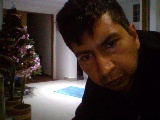

'FPS:9.94 frame1947'

'KaoDtad'

[(3, 0.9725094),
 (6, 0.02647831),
 (2, 0.0009505231),
 (0, 6.1565035e-05),
 (4, 1.5133038e-07)]

KeyboardInterrupt: ignored

In [ ]:

# label for video
label_html = 'Capturing...'
# initialze pose overlay to empty
pose = ''
count = 0
pose_queue= []



muay_labels ={0: "KaoTrong",
              1: "KaoChieng",
              2: "KaoLaa",
              3: "KaoDtad",
              4: "KaoDti",
              5: "KaoKratai",
              6: "KaoLoi"}

action_label= "none"

action_onscreen = 70
action_count =0
label_map = [x.strip() for x in open(args['label_map']).readlines()]
# reference start time of the loop
start_time = time.time()
pose_queue =[]

hostname ='tcp://8.tcp.ngrok.io'
port = 11507
receiver = VideoStreamSubscriber(hostname, port)
display_handle=display(None, display_id=True)
FPS_text=display(None, display_id=True)
action_display=display(None, display_id=True)
prediction_info=display(None, display_id=True)

start_time = time.time()
i=0
show_display = False
try:
  while True:
    msg, frame = receiver.receive()
    img = cv2.imdecode(np.frombuffer(frame, dtype='uint8'), -1)
    i+=1

    image_height, image_width, _ = img.shape
    h, w = image_height, image_width

    count+=1

    new_w, new_h = mmcv.rescale_size((w, h), (480, np.Inf))
    img = mmcv.imresize(img, (new_w, new_h))

    # create transparent overlay for pose
    #pose_array = np.zeros([image_height,image_width,4], dtype=np.uint8)

    # Resize and pad the image to keep the aspect ratio and fit the expected size.

    # Run model inference.
    det_result= detection_inference(args,img)
    torch.cuda.empty_cache()
    pose_result = pose_inference(args, img, det_result)
    torch.cuda.empty_cache()

    #pose_result=[]
    #only append if pose_result got data
    if len(pose_result) > 0:
      pose_queue.append(pose_result)

    if len(pose_queue) > args['clip_len']:
      poses_to_infer = pose_queue[:args['clip_len']]
      del pose_queue[:args['clip_len']]
      fake_anno = dict(
        frame_dir='',
        label=-1,
        img_shape=(h, w),
        original_shape=(h, w),
        start_index=0,
        modality='Pose',
        total_frames=args['clip_len'])
      tracking_inputs = [[pose['keypoints'] for pose in poses] for poses in poses_to_infer]
      keypoint, keypoint_score = pose_tracking(tracking_inputs, max_tracks=1)
      fake_anno['keypoint'] = keypoint
      fake_anno['keypoint_score'] = keypoint_score

      prediction = inference_recognizer(model_muay, fake_anno)
      #if (prediction[0][1] > 0.7) &  (prediction[0][1] < 0.99) :
      action_label = label_map[prediction[0][0]]

      action_display.update(action_label)
      prediction_info.update(prediction)


    ## Visualize the predictions with image.
    #pose_array = results[0].plot(img=pose_array)
    ## Calculate FPS
    #pose_array =cv2.cvtColor(pose_array, cv2.COLOR_RGB2RGBA)
    #cv2.putText(pose_array,"FPS:{}".format(round(1.0 / (time.time() - start_time),2)), (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),2)
    #cv2.putText(pose_array, action_label, (400, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),2)
    #alpha = np.full((image_height,image_width), 128, dtype=np.uint8)
    #pose_array[:,:,3] =alpha
    ## convert overlay image into bytes
    #pose_bytes = pose_to_bytes(pose_array)
    ## update image so next frame gets new overlay
    #pose = pose_bytes
    #label_html = "FPS:{}".format(round(1.0 / (time.time() - start_time),2)) + " " + action_label + " : " + str(len(pose_result)) + " : " + str(count)
    # reference start time of the loop
    if show_display:
      image = cv2.resize(img,(160,120))
      _, image = cv2.imencode('.jpeg', image)
      display_handle.update(Image(data=image.tobytes()))
    else:
      display_handle.update(None)
    #jcv2.imshow('test',image)
    FPS_text.update("FPS:{}".format(round(1.0 / (time.time() - start_time),2)) + " frame" + str(i))
    key = jcv2.waitKey(1)
    if key==ord('q'):
      break
    if key==ord(' '):
      show_display = not show_display
    start_time = time.time()
except Exception as ex:
  print('Python error with no Exception handler:')
  print('Traceback error:', ex)
  traceback.print_exc()
finally:
  receiver.close()
  receiver =None
  jcv2.destroyAllWindows()